In [1]:
import pandas as pd

train = pd.read_csv('../data/imdb/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('../data/imdb/testData.tsv', header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('../data/imdb/unlabeledTrainData.tsv', header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

(25000, 3)
(25000, 2)
(50000, 2)


In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [4]:
unlabeled_train.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [5]:
# 텍스트 정제 과정을 모듈로 만듦
from KaggleWord2VecUtility import KaggleWord2VecUtility

KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [6]:
sentences = []

for review in train['review']:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)
    
for review in unlabeled_train['review']:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)

/Users/jiwoonwon/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/jiwoonwon/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/jiwoonwon/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/jiwoo

### Word2Vec 모델 학습
전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 됨.

In [8]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

In [9]:
# 파라미터값 지정
num_features = 300 # 문자벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

model

2018-06-30 17:31:13,833 : INFO : 'pattern' package not found; tag filters are not available for English
2018-06-30 17:31:13,837 : INFO : collecting all words and their counts
2018-06-30 17:31:13,838 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-30 17:31:13,884 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2018-06-30 17:31:13,933 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2018-06-30 17:31:13,978 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2018-06-30 17:31:14,024 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2018-06-30 17:31:14,069 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2018-06-30 17:31:14,117 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2018-06-30 17:31:14,163 : INFO : PROGRESS: at senten

2018-06-30 17:31:17,421 : INFO : PROGRESS: at sentence #710000, processed 15880371 words, keeping 82560 word types
2018-06-30 17:31:17,475 : INFO : PROGRESS: at sentence #720000, processed 16105658 words, keeping 83036 word types
2018-06-30 17:31:17,526 : INFO : PROGRESS: at sentence #730000, processed 16332039 words, keeping 83571 word types
2018-06-30 17:31:17,575 : INFO : PROGRESS: at sentence #740000, processed 16553072 words, keeping 84127 word types
2018-06-30 17:31:17,624 : INFO : PROGRESS: at sentence #750000, processed 16771399 words, keeping 84599 word types
2018-06-30 17:31:17,674 : INFO : PROGRESS: at sentence #760000, processed 16990803 words, keeping 85068 word types
2018-06-30 17:31:17,725 : INFO : PROGRESS: at sentence #770000, processed 17217940 words, keeping 85644 word types
2018-06-30 17:31:17,776 : INFO : PROGRESS: at sentence #780000, processed 17448086 words, keeping 86160 word types
2018-06-30 17:31:17,826 : INFO : PROGRESS: at sentence #790000, processed 176751

2018-06-30 17:32:03,360 : INFO : EPOCH 4 - PROGRESS: at 28.82% examples, 913589 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:04,366 : INFO : EPOCH 4 - PROGRESS: at 35.61% examples, 902929 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:05,368 : INFO : EPOCH 4 - PROGRESS: at 42.97% examples, 910915 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:06,370 : INFO : EPOCH 4 - PROGRESS: at 50.90% examples, 926854 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:07,374 : INFO : EPOCH 4 - PROGRESS: at 57.26% examples, 913397 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:08,380 : INFO : EPOCH 4 - PROGRESS: at 63.95% examples, 907702 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:09,384 : INFO : EPOCH 4 - PROGRESS: at 71.10% examples, 909045 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:10,392 : INFO : EPOCH 4 - PROGRESS: at 78.95% examples, 917652 words/s, in_qsize 7, out_qsize 0
2018-06-30 17:32:11,396 : INFO : EPOCH 4 - PROGRESS: at 86.86% examples, 925639 words/s, in_qsiz

In [10]:
# 학습이 완료되면 필요 없는 메모리를 unload 시킴
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
model.save(model_name)

2018-06-30 17:40:56,498 : INFO : precomputing L2-norms of word weight vectors
2018-06-30 17:40:56,628 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2018-06-30 17:40:56,629 : INFO : not storing attribute vectors_norm
2018-06-30 17:40:56,630 : INFO : not storing attribute cum_table
2018-06-30 17:40:56,952 : INFO : saved 300features_40minwords_10text


### 모델 결과 탐색

In [12]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [13]:
model.wv.doesnt_match('france england germany berlin'.split())

2018-06-30 17:42:15,181 : WARNING : vectors for words {'france', 'germany'} are not present in the model, ignoring these words


'berlin'

In [14]:
# 가장 유사한 단어를 추출
model.wv.most_similar('man')

[('woman', 0.6382834911346436),
 ('millionair', 0.5265589356422424),
 ('lad', 0.512600302696228),
 ('businessman', 0.5088748931884766),
 ('ladi', 0.4964161217212677),
 ('loner', 0.46899303793907166),
 ('farmer', 0.46699413657188416),
 ('men', 0.4666064381599426),
 ('doctor', 0.4572756588459015),
 ('lawyer', 0.44356265664100647)]

In [15]:
model.wv.most_similar('queen')

[('princess', 0.6436662673950195),
 ('maid', 0.5718888640403748),
 ('princ', 0.5637645125389099),
 ('bride', 0.5588862299919128),
 ('goddess', 0.5579889416694641),
 ('stepmoth', 0.5533679127693176),
 ('mistress', 0.5517088174819946),
 ('victoria', 0.546028733253479),
 ('dame', 0.5448894500732422),
 ('madam', 0.5425229072570801)]

### Word2Vec으로 벡터화한 단어를 t-SNE를 통해 시각화

In [17]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

# 그래프에서 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100, :])

2018-06-30 17:56:29,299 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2018-06-30 17:56:30,209 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2018-06-30 17:56:30,209 : INFO : setting ignored attribute vectors_norm to None
2018-06-30 17:56:30,210 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2018-06-30 17:56:30,211 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2018-06-30 17:56:30,211 : INFO : setting ignored attribute cum_table to None
2018-06-30 17:56:30,212 : INFO : loaded 300features_40minwords_10text
/Users/jiwoonwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/jiwoonwon/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid 

11986
[ 0.02496398 -0.00817855  0.00877652 -0.03612713 -0.01153151 -0.08890057
 -0.0659399  -0.09499817 -0.01671519 -0.0482769 ]


In [18]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [19]:
df.head(10)

,x,y
with,18.145876,81.161324
all,59.499439,36.932301
this,12.586229,20.768644
stuff,4.203270,-41.686138
go,-74.757904,30.344584
down,-22.536526,114.194328
at,-10.730000,84.970406
the,50.072540,55.885727
moment,50.186485,5.079681
mj,-5.962255,-98.722374


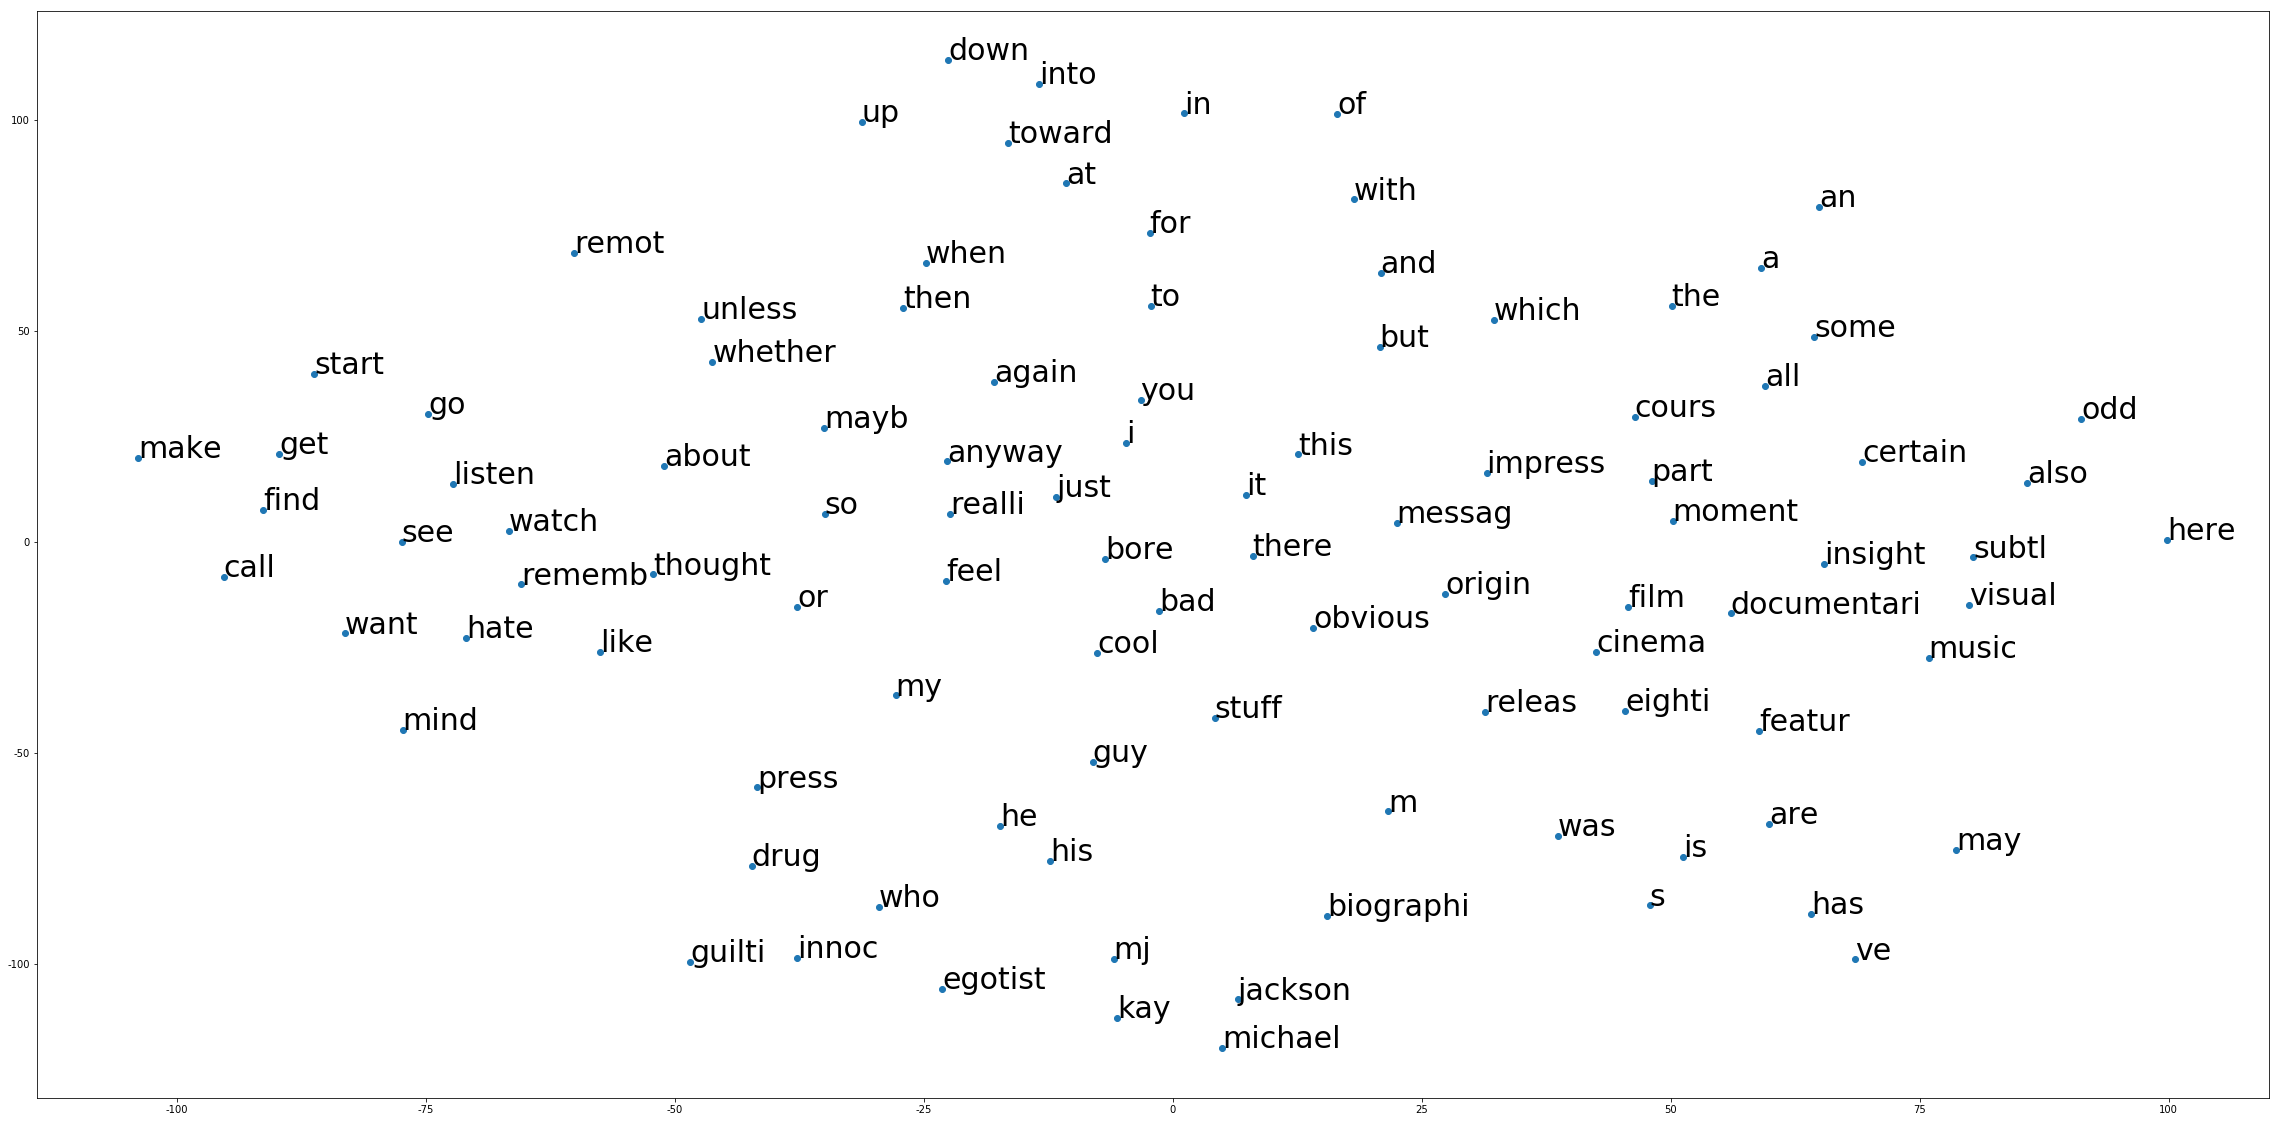

In [20]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.show()